# Final Exam: G League to NBA Data Analysis Using Python


Louie Al-Hafidh
8/11/18

Hello World and welcome to my final exam project!  

The goal of this project is to show my learnings in python while applying it to sports, the industry I eventually hope to have my career in. Recently, I had an interview with the Indiana Pacers, a professional basketball franchise. They asked me the question, "What statistics in the NBA G League are most indicative of NBA success?" After initially answer the question in excel, I have now tried to demonstrate the answer in Python. 

In [130]:
#Importing various libraries to help with my code
import matplotlib.pyplot as plt
import matplotlib.pylab as plb 
import math
import numpy as np
import seaborn as sns 
import datetime as dt 
import pandas as pd
#from mpl_toolkits.basemap import Basemap 
import networkx as nx
import statsmodels 
import sklearn
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [138]:
data = pd.read_csv("GLeagueToNBA2.csv") # this is my sheet of data and I am importing it now
data

,Player,PER,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,Hassan Whiteside,24.2,0.590,NaN,0.592,0.553,5.500,0.200,0.400,2.30,1.100,7.200
1,"Clint Capela,",21.6,0.601,0.000,0.605,0.596,9.700,0.800,0.800,3.00,1.800,16.000
2,Rudy Gobert,20.6,0.741,NaN,0.741,0.705,11.400,0.400,0.600,3.00,1.400,13.900
3,Jordan Bell,18.0,0.778,NaN,0.778,NaN,6.000,5.000,5.000,1.00,2.000,14.000
4,"Eric Bledsoe,",17.9,0.500,0.500,0.500,0.600,1.500,8.500,0.500,0.00,3.000,12.500
5,"Richaun Holmes,",17.5,0.592,0.167,0.651,0.737,4.000,1.000,0.300,1.50,1.500,12.200
6,"CJ McCollum,",17.2,0.472,0.111,0.593,1.000,3.500,3.500,1.500,0.00,3.000,18.500
7,Marcin Gortat,17.2,0.488,NaN,0.488,0.700,6.800,1.200,0.600,0.60,1.400,9.800
8,"Cheick Diallo,",17.0,0.502,0.000,0.508,0.753,8.500,0.700,0.500,2.40,1.700,15.000
9,Chris Andersen,16.7,0.444,0.000,0.500,0.750,3.700,0.300,1.000,1.70,1.000,4.700


In [136]:
data2 = data.dropna()
data2

,Player,PER,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
1,"Clint Capela,",21.6,0.601,0.000,0.605,0.596,9.7,0.8,0.8,3.0,1.8,16.0
4,"Eric Bledsoe,",17.9,0.500,0.500,0.500,0.600,1.5,8.5,0.5,0.0,3.0,12.5
5,"Richaun Holmes,",17.5,0.592,0.167,0.651,0.737,4.0,1.0,0.3,1.5,1.5,12.2
6,"CJ McCollum,",17.2,0.472,0.111,0.593,1.000,3.5,3.5,1.5,0.0,3.0,18.5
8,"Cheick Diallo,",17.0,0.502,0.000,0.508,0.753,8.5,0.7,0.5,2.4,1.7,15.0
9,Chris Andersen,16.7,0.444,0.000,0.500,0.750,3.7,0.3,1.0,1.7,1.0,4.7
12,"Rodney McGruder,",9.5,0.498,0.366,0.581,0.694,4.8,2.0,1.0,0.2,1.3,13.4
13,"Solomon Hill,",9.4,0.462,0.385,0.538,0.833,3.5,3.0,1.0,1.0,4.0,17.0
14,"Sterling Brown,",9.1,0.421,0.294,0.475,0.857,6.0,2.0,2.0,0.3,4.0,21.7
15,"Bryn Forbes,",8.6,0.502,0.459,0.528,0.869,3.5,2.7,1.3,0.1,2.5,23.4


In [93]:
#specify data as data frame
df = pd.DataFrame(data)

# Analyze the Data

In [94]:
data.info() #let's look at the info of our data, 
#looks like we have most columns with 28 values with a few that are less than 28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
Player    28 non-null object
PER       27 non-null float64
FG%       28 non-null float64
3P%       22 non-null float64
2P%       27 non-null float64
FT%       27 non-null float64
TRB       28 non-null float64
AST       28 non-null float64
STL       28 non-null float64
BLK       28 non-null float64
TOV       28 non-null float64
PTS       28 non-null float64
dtypes: float64(11), object(1)
memory usage: 2.8+ KB


In [95]:
data.shape #this gives us the dimensions of the data/array

(29, 12)

In [96]:
df.describe() #let's look at the statstical overview of our data

,PER,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
count,27.000000,28.000000,22.000000,27.000000,27.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,12.511111,0.505679,0.256045,0.542778,0.846000,5.349714,2.196143,1.066607,1.044286,2.134250,13.453750
std,5.681098,0.105369,0.257483,0.090483,0.613988,2.442455,1.928231,0.943280,1.006547,1.014959,5.018452
min,5.100000,0.357000,-0.653000,0.388000,-0.242000,0.292000,-0.208000,-0.135000,0.000000,-0.441000,-0.395000
25%,7.600000,0.442750,0.175250,0.494000,0.702500,3.925000,0.950000,0.500000,0.300000,1.400000,10.300000
50%,9.400000,0.472000,0.344500,0.525000,0.769000,4.900000,1.650000,1.000000,0.600000,2.000000,13.400000
75%,17.200000,0.553750,0.387250,0.587500,0.864500,6.350000,3.125000,1.300000,1.625000,2.775000,16.050000
max,24.200000,0.778000,0.512000,0.778000,3.700000,11.400000,8.500000,5.000000,3.000000,4.000000,23.400000


In [97]:
data.head() #shows us the first 5 rows of data/players

,Player,PER,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,Hassan Whiteside,24.2,0.590,NaN,0.592,0.553,5.5,0.2,0.4,2.3,1.1,7.2
1,"Clint Capela,",21.6,0.601,0.0,0.605,0.596,9.7,0.8,0.8,3.0,1.8,16.0
2,Rudy Gobert,20.6,0.741,NaN,0.741,0.705,11.4,0.4,0.6,3.0,1.4,13.9
3,Jordan Bell,18.0,0.778,NaN,0.778,NaN,6.0,5.0,5.0,1.0,2.0,14.0
4,"Eric Bledsoe,",17.9,0.500,0.5,0.500,0.600,1.5,8.5,0.5,0.0,3.0,12.5


In [98]:
data['Player'] #showing all the players in our data set

0            Hassan Whiteside
1              Clint Capela, 
2                 Rudy Gobert
3                 Jordan Bell
4              Eric Bledsoe, 
5            Richaun Holmes, 
6               CJ McCollum, 
7               Marcin Gortat
8             Cheick Diallo, 
9              Chris Andersen
10             Cole Aldrich, 
11                 Ed Davis, 
12          Rodney McGruder, 
13             Solomon Hill, 
14           Sterling Brown, 
15              Bryn Forbes, 
16            Darius Miller, 
17              Patrick McCaw
18    Timothe Luwawu-Cabarrot
19              Okaro White, 
20      Marcus Georges-Hunt, 
21               Brandon Paul
22        Terrance Ferguson, 
23          DeAndre Liggins, 
24         Malachi Richardson
25             Josh Huestis, 
26              Abdel Nader, 
27                        NaN
28             Correlations: 
Name: Player, dtype: object

To answer the Pacers question, I compared players who used to be in the G League and then had a PER above 16.54 and below 9.62 in the NBA. I manually, and quite tediously created a CSV sheet of players who used to play in the G League and then played in the NBA, all while entering their PER's AND per game averages in the G league. PER stands for Player Efficiency Rating and is a good metric to show how good a player is relative to other players. A number above 15 means they are an above average player. I wanted to compared the 4th/Highest quartile and 1st/lowest quartile. 

In [99]:
#Showing all the Player Efficiency Ratings or PER for each player in our data set. 
data['PER'] 

0     24.2
1     21.6
2     20.6
3     18.0
4     17.9
5     17.5
6     17.2
7     17.2
8     17.0
9     16.7
10    16.6
11    16.6
12     9.5
13     9.4
14     9.1
15     8.6
16     8.4
17     8.0
18     7.9
19     7.7
20     7.5
21     7.5
22     7.4
23     7.3
24     7.3
25     6.0
26     5.1
27     NaN
28     NaN
Name: PER, dtype: float64

# Find Correlations 

In [100]:
#let's explore correlations, the Correlation between PER and FG% is rather high at 0.7189689747411642
FGCorrelation = data['PER'].corr(data['FG%'])
data['PER'].corr(data['FG%'])


0.7189689747411642

In [101]:
print(round(FGCorrelation, 3)) #Rounding the correlation three digits

0.719


In [134]:
#now lets find all the correlations between PER and the rest of the columns that represent G League Per Game Averages
data['PER'].corr(data['3P%']), data['PER'].corr(data['2P%']), data['PER'].corr(data['FT%']), data['PER'].corr(data['TRB']), data['PER'].corr(data['AST']), data['PER'].corr(data['STL']), data['PER'].corr(data['BLK']), data['PER'].corr(data['TOV']), data['PER'].corr(data['PTS'])


(-0.6529889907545061,
 0.5238477930413273,
 -0.24192706931137398,
 0.2917755859330648,
 -0.20826753808545814,
 -0.134580633834335,
 0.6399215842903495,
 -0.44089287971105556,
 -0.39517803860278966)

# Create Correlation Tables

In [103]:
data.corr(method='pearson') 
#Here we can quickly and easily look at the pearson correlation between each variable to one another
#The first row answers what the Indiana Pacers asked me, 
#The stats that are most indicative of NBA success are FG%, 2P%, and blocks. 

,PER,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
PER,1.000000,0.718969,-0.652989,0.523848,-0.241927,0.291776,-0.208268,-0.134581,0.639922,-0.440893,-0.395178
FG%,0.718969,1.000000,-0.680157,0.774711,-0.430664,0.184141,-0.205156,0.089970,0.484572,-0.474117,-0.304220
3P%,-0.652989,-0.680157,1.000000,-0.217938,0.344144,0.118334,0.526727,0.466303,-0.395359,0.596013,0.537146
2P%,0.523848,0.774711,-0.217938,1.000000,-0.359197,0.273361,-0.120040,0.307183,0.358548,-0.141251,0.035079
FT%,-0.241927,-0.430664,0.344144,-0.359197,1.000000,0.008501,0.047324,0.236461,-0.190337,0.271551,0.225399
TRB,0.291776,0.184141,0.118334,0.273361,0.008501,1.000000,-0.227787,0.072845,0.594944,0.067794,0.295848
AST,-0.208268,-0.205156,0.526727,-0.120040,0.047324,-0.227787,1.000000,0.465905,-0.514251,0.558513,0.353785
STL,-0.134581,0.089970,0.466303,0.307183,0.236461,0.072845,0.465905,1.000000,-0.317687,0.373320,0.335468
BLK,0.639922,0.484572,-0.395359,0.358548,-0.190337,0.594944,-0.514251,-0.317687,1.000000,-0.364630,-0.252157
TOV,-0.440893,-0.474117,0.596013,-0.141251,0.271551,0.067794,0.558513,0.373320,-0.364630,1.000000,0.753619


In [104]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
#to make this easier on the eyes, let's use a color gradient format to identify our highest and lowest correlations
#the more red the higher/positve the correlation
#the more blue, the lower/negative the correlation 

,PER,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
PER,1.0,0.72,-0.65,0.52,-0.24,0.29,-0.21,-0.13,0.64,-0.44,-0.4
FG%,0.72,1.0,-0.68,0.77,-0.43,0.18,-0.21,0.09,0.48,-0.47,-0.3
3P%,-0.65,-0.68,1.0,-0.22,0.34,0.12,0.53,0.47,-0.4,0.6,0.54
2P%,0.52,0.77,-0.22,1.0,-0.36,0.27,-0.12,0.31,0.36,-0.14,0.035
FT%,-0.24,-0.43,0.34,-0.36,1.0,0.0085,0.047,0.24,-0.19,0.27,0.23
TRB,0.29,0.18,0.12,0.27,0.0085,1.0,-0.23,0.073,0.59,0.068,0.3
AST,-0.21,-0.21,0.53,-0.12,0.047,-0.23,1.0,0.47,-0.51,0.56,0.35
STL,-0.13,0.09,0.47,0.31,0.24,0.073,0.47,1.0,-0.32,0.37,0.34
BLK,0.64,0.48,-0.4,0.36,-0.19,0.59,-0.51,-0.32,1.0,-0.36,-0.25
TOV,-0.44,-0.47,0.6,-0.14,0.27,0.068,0.56,0.37,-0.36,1.0,0.75


In [137]:
data2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,PER,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
PER,1.0,0.69,-0.65,0.4,-0.2,0.055,-0.041,-0.37,0.53,-0.26,-0.25
FG%,0.69,1.0,-0.28,0.72,-0.39,0.15,-0.15,-0.48,0.44,-0.23,0.051
3P%,-0.65,-0.28,1.0,-0.35,0.1,-0.42,0.51,0.087,-0.68,0.3,0.2
2P%,0.4,0.72,-0.35,1.0,-0.44,0.041,-0.24,-0.18,0.16,-0.062,0.16
FT%,-0.2,-0.39,0.1,-0.44,1.0,-0.13,-0.1,0.096,-0.26,0.063,-0.017
TRB,0.055,0.15,-0.42,0.041,-0.13,1.0,-0.33,0.094,0.58,0.0077,0.26
AST,-0.041,-0.15,0.51,-0.24,-0.1,-0.33,1.0,0.21,-0.49,0.48,0.15
STL,-0.37,-0.48,0.087,-0.18,0.096,0.094,0.21,1.0,-0.46,0.58,0.39
BLK,0.53,0.44,-0.68,0.16,-0.26,0.58,-0.49,-0.46,1.0,-0.41,-0.25
TOV,-0.26,-0.23,0.3,-0.062,0.063,0.0077,0.48,0.58,-0.41,1.0,0.66


In [128]:
data.corr(method='pearson', min_periods=1).style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,PER,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
PER,1.0,0.69,-0.65,0.4,-0.2,0.055,-0.041,-0.37,0.53,-0.26,-0.25
FG%,0.69,1.0,-0.28,0.72,-0.39,0.15,-0.15,-0.48,0.44,-0.23,0.051
3P%,-0.65,-0.28,1.0,-0.35,0.1,-0.42,0.51,0.087,-0.68,0.3,0.2
2P%,0.4,0.72,-0.35,1.0,-0.44,0.041,-0.24,-0.18,0.16,-0.062,0.16
FT%,-0.2,-0.39,0.1,-0.44,1.0,-0.13,-0.1,0.096,-0.26,0.063,-0.017
TRB,0.055,0.15,-0.42,0.041,-0.13,1.0,-0.33,0.094,0.58,0.0077,0.26
AST,-0.041,-0.15,0.51,-0.24,-0.1,-0.33,1.0,0.21,-0.49,0.48,0.15
STL,-0.37,-0.48,0.087,-0.18,0.096,0.094,0.21,1.0,-0.46,0.58,0.39
BLK,0.53,0.44,-0.68,0.16,-0.26,0.58,-0.49,-0.46,1.0,-0.41,-0.25
TOV,-0.26,-0.23,0.3,-0.062,0.063,0.0077,0.48,0.58,-0.41,1.0,0.66


In [144]:
objects = ('FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK','TOV','PTS')
y_pos = np.arange(len(objects))
performance = [.72, -.65,0.52,-0.24,0.29,-0.21,-0.13,0.64,-0.44,-0.4]

labels = ['1','2','3','4','5','6','7','8','9','10']
plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(labels, rotation='vertical')
plt.xticks(y_pos, objects)
plt.ylabel('Correlation')
plt.title('Correlation Between NBA PER vs NBA G League Per Game Averages')
plt.show()

AttributeError: 'NoneType' object has no attribute 'seq'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x111ef5598> (for post_execute):


AttributeError: 'NoneType' object has no attribute 'seq'

AttributeError: 'NoneType' object has no attribute 'seq'

# Plot Correlations for each Per Game Statistic/Column

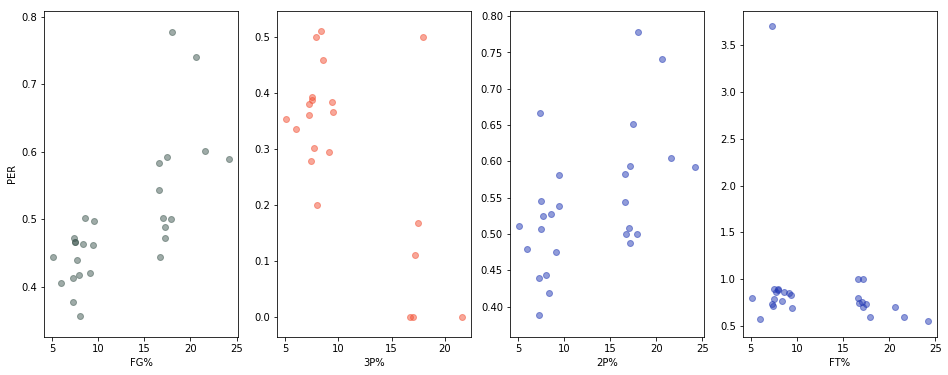

In [145]:
# Below are all the plots correlated values for FG%, 3P%, 2P%, and FT%
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=4)

ax=ax.flatten()

cols = ['FG%', '3P%', '2P%', 'FT%', ]
colors = ['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('PER')
    i.scatter(data['PER'], data[cols[j]],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    j+=1

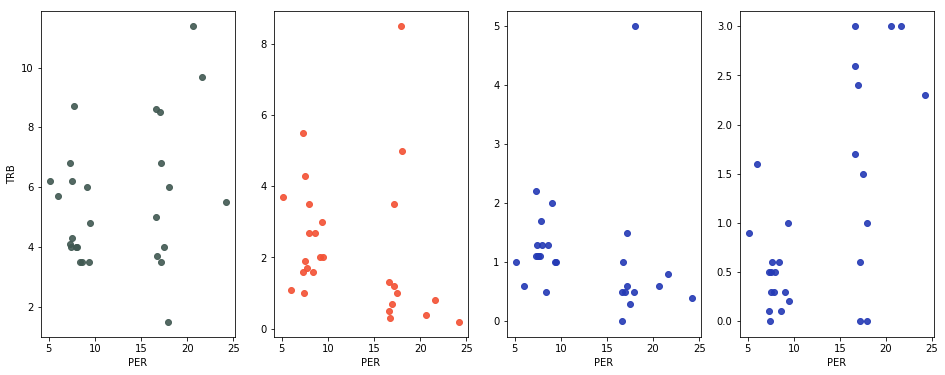

In [151]:
# plot correlated values for 'TRB', 'AST', 'STL', 'BLK'
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=4)

ax=ax.flatten()

cols = ['TRB', 'AST', 'STL', 'BLK', ]
colors = ['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel(cols[j])
    i.scatter(x = data['PER'], y = data[cols[j]],  alpha=0.9, color=colors[j])
    i.set_xlabel('PER')
    j+=1

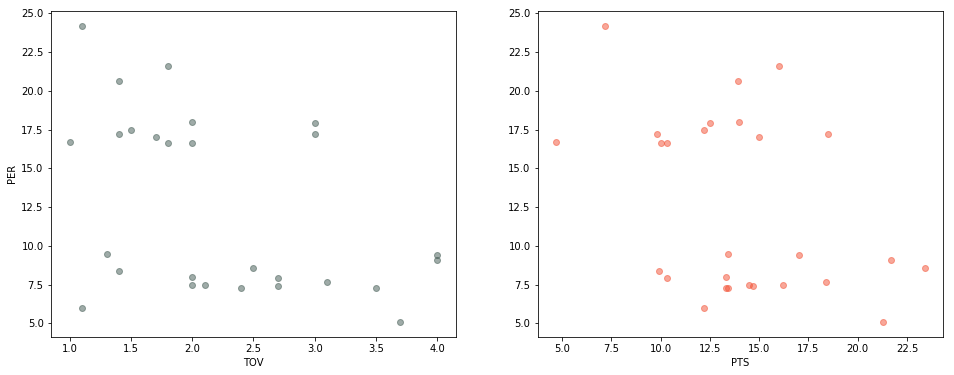

In [108]:
# plot correlated values for 'TOV', 'PTS'
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=2)

ax=ax.flatten()

cols = ['TOV', 'PTS', ]
colors = ['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('PER')
    i.scatter(data[cols[j]], data['PER'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    j+=1

# Plotting the Data

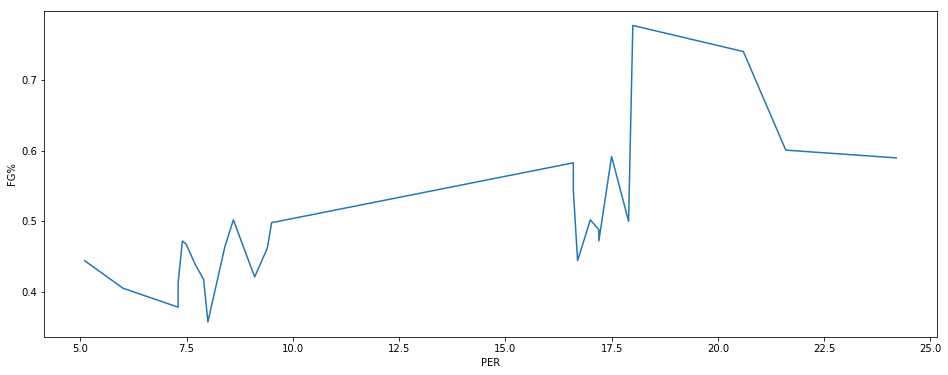

In [109]:
#Plotting the PER vs FG% 
plt.xlabel('PER')
plt.ylabel('FG%')
plt.plot(data['PER'], data['FG%'])
plt.show()
#the players with higher PER's have a higher Field Goal Percentage

In [110]:
#I am going to store linear regression object in a variable called lm with the goal of trying to do a 
#linear regression/ best fit line 

X = data.drop('PER', axis = 1)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
data = data.dropna() #drop the null values 

In [112]:
#After dropping the nulls, checking to see which players remain
data['Player']

1            Clint Capela, 
4            Eric Bledsoe, 
5          Richaun Holmes, 
6             CJ McCollum, 
8           Cheick Diallo, 
9            Chris Andersen
12        Rodney McGruder, 
13           Solomon Hill, 
14         Sterling Brown, 
15            Bryn Forbes, 
16          Darius Miller, 
17            Patrick McCaw
19            Okaro White, 
20    Marcus Georges-Hunt, 
21             Brandon Paul
22      Terrance Ferguson, 
23        DeAndre Liggins, 
24       Malachi Richardson
25           Josh Huestis, 
26            Abdel Nader, 
Name: Player, dtype: object

In [113]:
#checking to see what is in the X_FG array
X_FG = data.iloc[:, 1:12].values
X_FG

array([[21.6  ,  0.601,  0.   ,  0.605,  0.596,  9.7  ,  0.8  ,  0.8  ,
         3.   ,  1.8  , 16.   ],
       [17.9  ,  0.5  ,  0.5  ,  0.5  ,  0.6  ,  1.5  ,  8.5  ,  0.5  ,
         0.   ,  3.   , 12.5  ],
       [17.5  ,  0.592,  0.167,  0.651,  0.737,  4.   ,  1.   ,  0.3  ,
         1.5  ,  1.5  , 12.2  ],
       [17.2  ,  0.472,  0.111,  0.593,  1.   ,  3.5  ,  3.5  ,  1.5  ,
         0.   ,  3.   , 18.5  ],
       [17.   ,  0.502,  0.   ,  0.508,  0.753,  8.5  ,  0.7  ,  0.5  ,
         2.4  ,  1.7  , 15.   ],
       [16.7  ,  0.444,  0.   ,  0.5  ,  0.75 ,  3.7  ,  0.3  ,  1.   ,
         1.7  ,  1.   ,  4.7  ],
       [ 9.5  ,  0.498,  0.366,  0.581,  0.694,  4.8  ,  2.   ,  1.   ,
         0.2  ,  1.3  , 13.4  ],
       [ 9.4  ,  0.462,  0.385,  0.538,  0.833,  3.5  ,  3.   ,  1.   ,
         1.   ,  4.   , 17.   ],
       [ 9.1  ,  0.421,  0.294,  0.475,  0.857,  6.   ,  2.   ,  2.   ,
         0.3  ,  4.   , 21.7  ],
       [ 8.6  ,  0.502,  0.459,  0.528,  0.869,  3.5  ,

In [114]:
#Checking to see what is in the Y_PER Array
Y_PER = data.loc[:, 'PER'].values
Y_PER

array([21.6, 17.9, 17.5, 17.2, 17. , 16.7,  9.5,  9.4,  9.1,  8.6,  8.4,
        8. ,  7.7,  7.5,  7.5,  7.4,  7.3,  7.3,  6. ,  5.1])

In [115]:
regression = lm.fit(X_FG, Y_PER) 

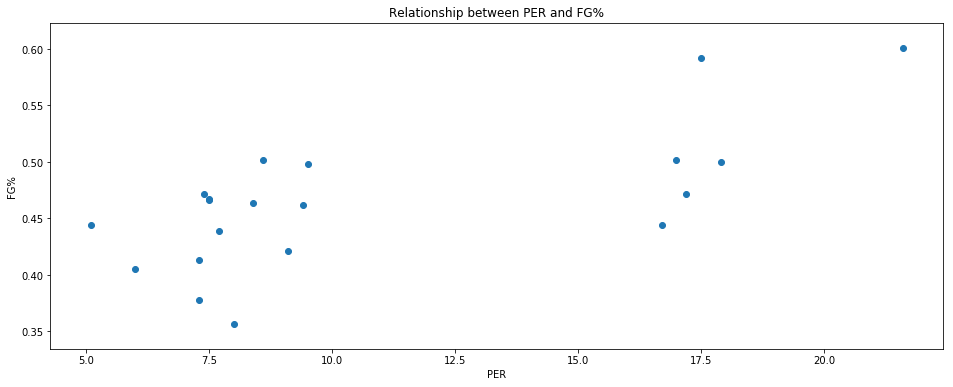

In [116]:
#now let's plot a large scatter plot instead of a line graph
plt.scatter(data['PER'], data['FG%'], marker='o')

x = data['PER']
y = data['FG%']
plt.xlabel('PER')
plt.ylabel('FG%')
plt.title('Relationship between PER and FG%')

plt.show()

# Creating Linear Regression Lines within our Scatter Plot

In [117]:
import pandas as pd
from sklearn import linear_model
from  matplotlib import pyplot 
import numpy as np

In [118]:
#read data and make a new data frame called dat
dat = pd.DataFrame(data,columns=['PER','FG%'])

x_values=dat['PER'].values[:,np.newaxis] #this is how you determine values, independent
y_values=dat['FG%'].values[:,np.newaxis] #this is how you determine values, dependent, MUST HAVE THIS AS WEZLL TO MAKE LINEEAR Regression 

In [119]:
FG_reg = linear_model.LinearRegression() #to actually create the linear regression you must 
#have the linear regression fuction
FG_reg.fit(x_values, y_values) #fit means when you take this linear regression and then apply to the data you have
prediction=FG_reg.predict(np.sort(x_values, axis=0)) #You must have a predict function to make linear regression, 
#predict is a best fit

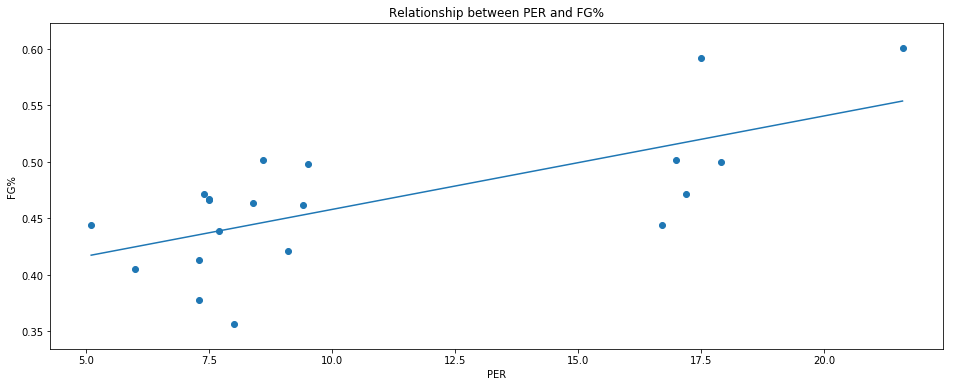

In [120]:
#now let's add a best fit line/linear regression to show the postive relationship between PER and FG%
#Linear Regression with a Positive correlation (FG%)

plt.xlabel('PER')
plt.ylabel('FG%')
plt.title('Relationship between PER and FG%')

pyplot.scatter(x_values, y_values)
pyplot.plot(np.sort(x_values, axis=0),prediction)
pyplot.show()

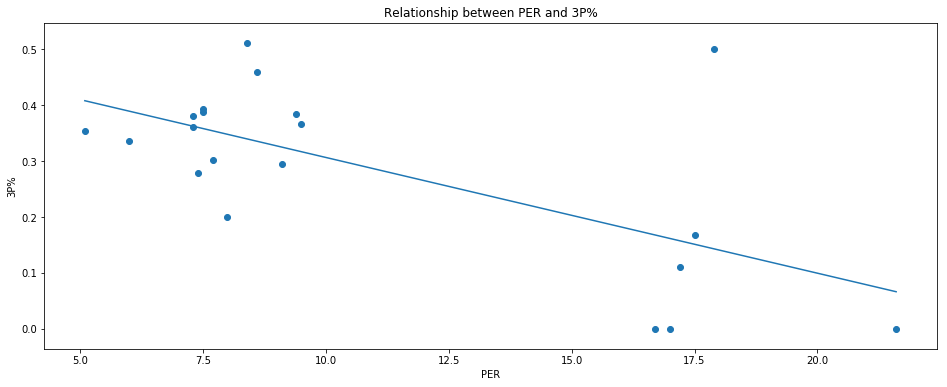

In [121]:
#Linear Regression with a negative correlation (3P%)
dat = pd.DataFrame(data,columns=['PER','3P%'])

x_values=dat['PER'].values[:,np.newaxis]
y_values=dat['3P%'].values[:,np.newaxis]

FG_reg = linear_model.LinearRegression()
FG_reg.fit(x_values, y_values)
prediction=FG_reg.predict(np.sort(x_values, axis=0))

plt.xlabel('PER')
plt.ylabel('3P%')
plt.title('Relationship between PER and 3P%')

pyplot.scatter(x_values, y_values)
pyplot.plot(np.sort(x_values, axis=0),prediction)
pyplot.show()

In [122]:
#End